<a href="https://colab.research.google.com/github/Nameekian/Image_Recognition_AI/blob/main/Image_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nameek","key":"68a8960c7a49b3235c042066d9a1e2a3"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f" Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
 Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(f" Train shaped: {X_train.shape}, Test shape: {X_test.shape}")

 Train shaped: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


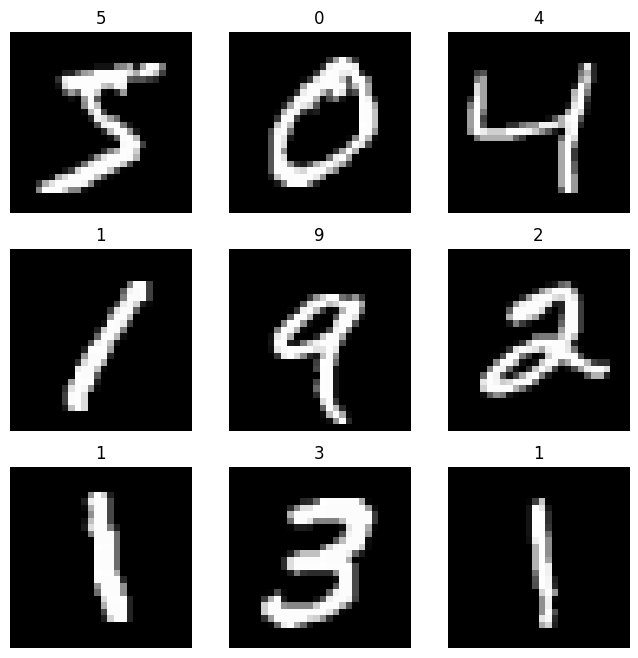

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap="gray")
  plt.title(y_train[i])
  plt.axis("off")
plt.show()


In [ ]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 Train shape: {X_test_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
CIFAR-10 Train shape: (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8862 - loss: 0.3800 - val_accuracy: 0.9789 - val_loss: 0.0689
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9827 - loss: 0.0525 - val_accuracy: 0.9862 - val_loss: 0.0483
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9878 - val_loss: 0.0424
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0245 - val_accuracy: 0.9890 - val_loss: 0.0351
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9891 - val_loss: 0.0421


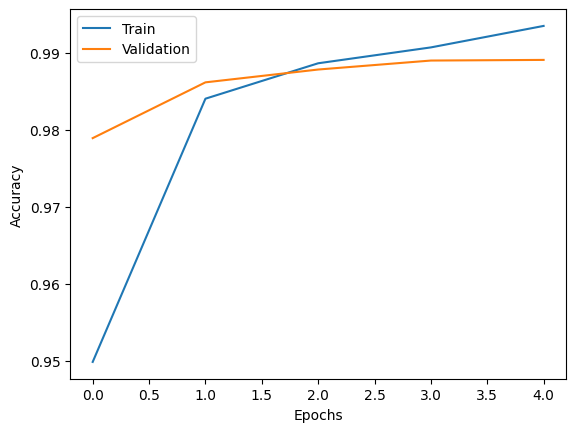

In [ ]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"],
         label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
y_pred= model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9873 - loss: 0.0431
Test accuracy: 0.9896
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
DAY 3

SyntaxError: invalid syntax (ipython-input-349768693.py, line 1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(datagen.flow(X_train_c10, y_train_c10, batch_size=32), epochs=10,validation_data=(X_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.3477 - loss: 1.7622 - val_accuracy: 0.5080 - val_loss: 1.4106
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5380 - loss: 1.3049 - val_accuracy: 0.5705 - val_loss: 1.2395
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5875 - loss: 1.1724 - val_accuracy: 0.5628 - val_loss: 1.3440
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6197 - loss: 1.0934 - val_accuracy: 0.6474 - val_loss: 1.0048
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6349 - loss: 1.0496 - val_accuracy: 0.5911 - val_loss: 1.2548
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6527 - loss: 1.0023 - val_accuracy: 0.6782 - val_loss: 0.9385
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6689 - loss: 0.9684 - val_accuracy: 0.5961 - val_loss: 1.2147
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6730 - loss: 0.94

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.85      0.83      0.84      1000
           2       0.78      0.41      0.54      1000
           3       0.60      0.44      0.51      1000
           4       0.61      0.67      0.64      1000
           5       0.73      0.48      0.58      1000
           6       0.72      0.79      0.76      1000
           7       0.51      0.89      0.65      1000
           8       0.88      0.67      0.76      1000
           9       0.69      0.88      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.71      0.68      0.68     10000



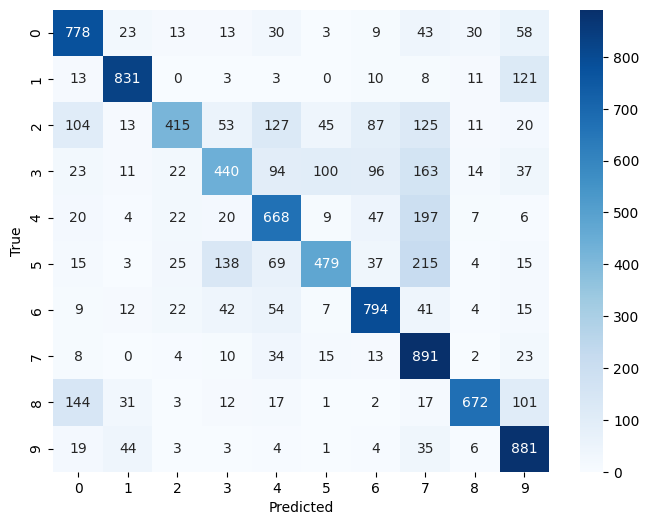

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10 = model.predict(X_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Day 4

SyntaxError: invalid syntax (ipython-input-815476733.py, line 1)

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 217M/218M [00:00<00:00, 741MB/s] 
100% 218M/218M [00:00<00:00, 781MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/CatsAndDogs')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(
    '/content/CatsAndDogs',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator=datagen.flow_from_directory(
    '/content/CatsAndDogs',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 130ms/step - accuracy: 0.7824 - loss: 0.5518 - val_accuracy: 0.7985 - val_loss: 0.5090
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.8032 - loss: 0.4936 - val_accuracy: 0.7985 - val_loss: 0.5096
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.7985 - loss: 0.4891 - val_accuracy: 0.7985 - val_loss: 0.5389
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7970 - loss: 0.4801 - val_accuracy: 0.7980 - val_loss: 0.5196
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8007 - loss: 0.4592 - val_accuracy: 0.7980 - val_loss: 0.5326


In [29]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 111s 234ms/step - accuracy: 0.8010 - loss: 0.4876 - val_accuracy: 0.7970 - val_loss: 0.5290
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.8004 - loss: 0.4538 - val_accuracy: 0.7980 - val_loss: 0.5269
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 125ms/step - accuracy: 0.8034 - loss: 0.4257 - val_accuracy: 0.7985 - val_loss: 0.5287


In [30]:
model.save("mobilenet_cats_dogs.h5")
#To Load
import tensorflow as tf
loaded_model = tf.keras.models.load_model("mobilenet_cats_dogs.h5")

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step


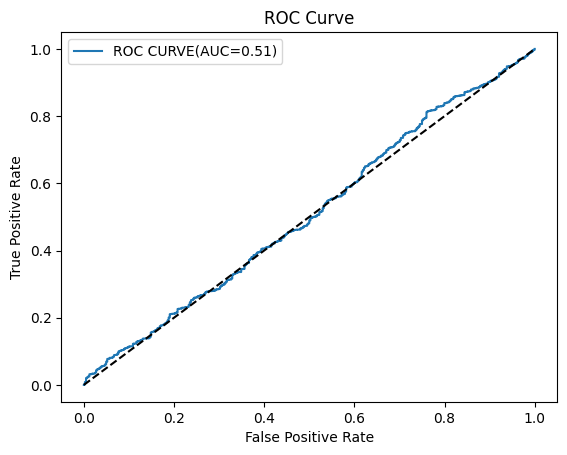

In [31]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'ROC CURVE(AUC={roc_auc:.2F})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
#To Check Predictions

In [34]:
from google.colab import files
uploaded = files.upload() # upload a cat picture

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'SmartCat.jpg' # Put your file name
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)
print("Predicted Class:", "Cat" if predictions[0][0] > 0.5 else "Dog")

Saving SmartCat.jpg to SmartCat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: Cat


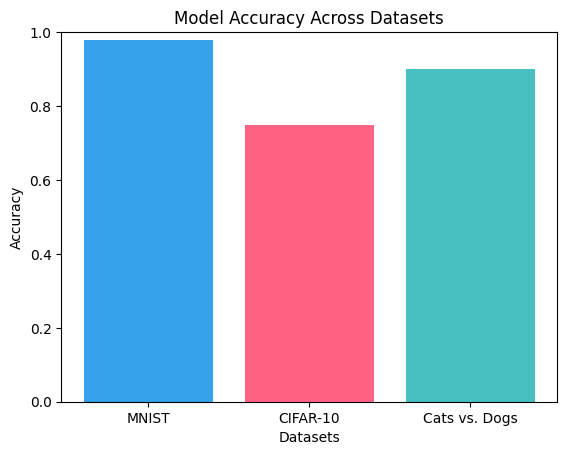

In [33]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies=[0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#48C0C0'])
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Across Datasets')
plt.show()